## Problem Statement No. 04
Consider the Bangalore House Price Data. Perform following operations.
1) Find and replace null values in the data using appropriate technique.
2) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
3) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of
the range to be taken.
4) Calculate and add one more column as ‘Price_Per_Sqft’
5) Remove the outliers from Price_Per_Sqft and BHK Size column if any.
6) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean
Squared Error and Accuracy

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_s

In [162]:
df=pd.read_csv(r"D:\OneDrive\Desktop\Desktop\New folder\Datasets\Banglore Housing Prices.csv")
df.head(40)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [164]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [165]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [166]:
df.shape

(13320, 5)

In [167]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [168]:
lst=['location', 'size', 'total_sqft', 'bath', 'price']
for i in lst:
    df.dropna(subset=[i],inplace=True)

In [169]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [170]:
def to_size(s):
    return s.split()[0]
    
df["size"]=df["size"].apply(to_size).astype(int)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [171]:
def sqft(s):
    try:
        if isinstance(s,str) and "-" in s:
            s=list(map(float,s.split("-")))
            return np.mean(s)
        else:
            return float(s)
    except ValueError:
        return np.nan
    

In [172]:
df["total_sqft"]=df["total_sqft"].apply(sqft)

In [173]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

In [174]:
df.dropna(inplace=True)

In [175]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [176]:
df["price_per_sqft"]=df["price"]/df["total_sqft"]

In [177]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500


<Axes: >

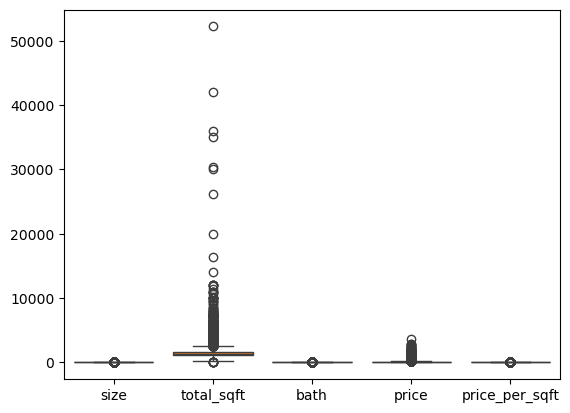

In [178]:
sns.boxplot(df)

<Axes: >

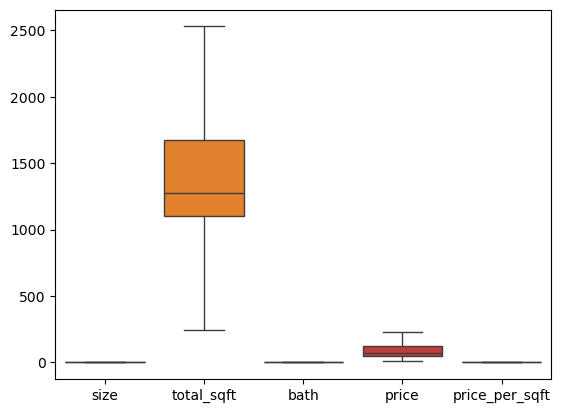

In [179]:
lst2=['size', 'total_sqft', 'bath', 'price','price_per_sqft']
for i in lst2:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])
sns.boxplot(df)

<Axes: >

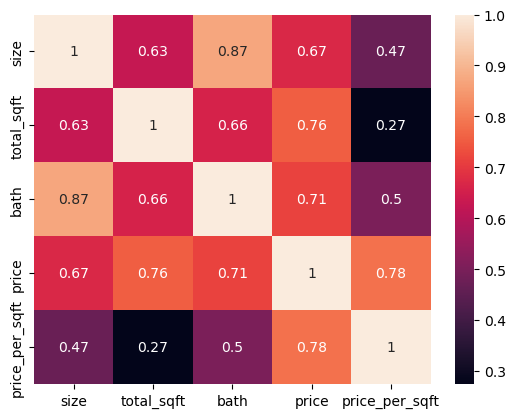

In [180]:
a=df.drop(["location"],axis=1)
sns.heatmap(a.corr(),annot=True)

In [183]:
y=df["price"]
x=df.drop(["price","price_per_sqft","location"],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [184]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [185]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ValueError: continuous is not supported